# Convolutional Neural Networks

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roy-cruz/CROEM-ML2025/blob/master/croem-ml2025/content/04_ConvNNs.ipynb)

### What is a **Convolution**?




A **convolution** is a mathematical operation that combines two functions 𝑓 and ℎ, producing a third function 𝑔, often written as:

$$g(t)=(f * h)(t) = \int_{-\infty}^{\infty} f(\tau) \cdot h(t - \tau) \, d\tau'$$


But in discrete cases (like digital 2D images), we use a summation instead of an integral:

$$(f * h)[i,j] = \sum_{m}\sum_{n} f[m,n] \cdot h(i - m,j-n)$$



---



#### Simple Example: **1D discrete Convolution**

Let’s say you have a signal 𝑓 and a filter ℎ:

$$ f = [3,2,1,0]$$
$$h=[1,0,-1]$$

Now applay convolution:

1.   Flip the filter

$$h_{flipped}=[-1,0,1]$$


2.   Slide the filter across the input and multiply-and-sum at each step:

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[\fbox{3},2,1,0]$$
$$~~~~~~~~~~[-1,0,\fbox{1}]$$
$ 3*1=3$
$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[\fbox{3},\fbox{2},1,0]$$
$$~~~~~~~~~~~~~~~~~~[-1,\fbox{0}, \fbox{1}]$$
$ 3*0 + 2*1 =2$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[\fbox{3},\fbox{2},\fbox{1},0]$$
$$~~~~~~~~~~~~~~~~~~~~~~~~~~[\fbox{-1},\fbox{0},\fbox{1}]$$
$ 3*(-1) + 2*0 + 1*1 =-2$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[3,\fbox{2},\fbox{1},\fbox{0}]$$
$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[\fbox{-1},\fbox{0},\fbox{1}]$$
$ 2*(-1) + 1*0 + 0*1 =-2$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[3,2,\fbox{1},\fbox{0}]$$
$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[\fbox{-1},\fbox{0},1]$$
$ 1*(-1) + 0*0  =-1$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[3,2,1,\fbox{0}]$$
$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[\fbox{-1},0,1]$$
$ 0*(-1)  =0$

Resulting convolved signal:

$$f*h= [3,2,-2,-2,-1,0]$$


In [ ]:
import numpy as np

a = np.convolve([3,2,1,0],(1,0,-1))

print(a)

[ 3  2 -2 -2 -1  0]




---



### Convolutional Neural Networks (CNNs)

A CNN is a type of Neural Network specifically designed to process data that has a **grid-like structure**, such as images. The CNN works through feature (parameters) optimization, and automatically learns to recognize patterns in images by applying small filters (called kernels) over them to perform tasks like classification.

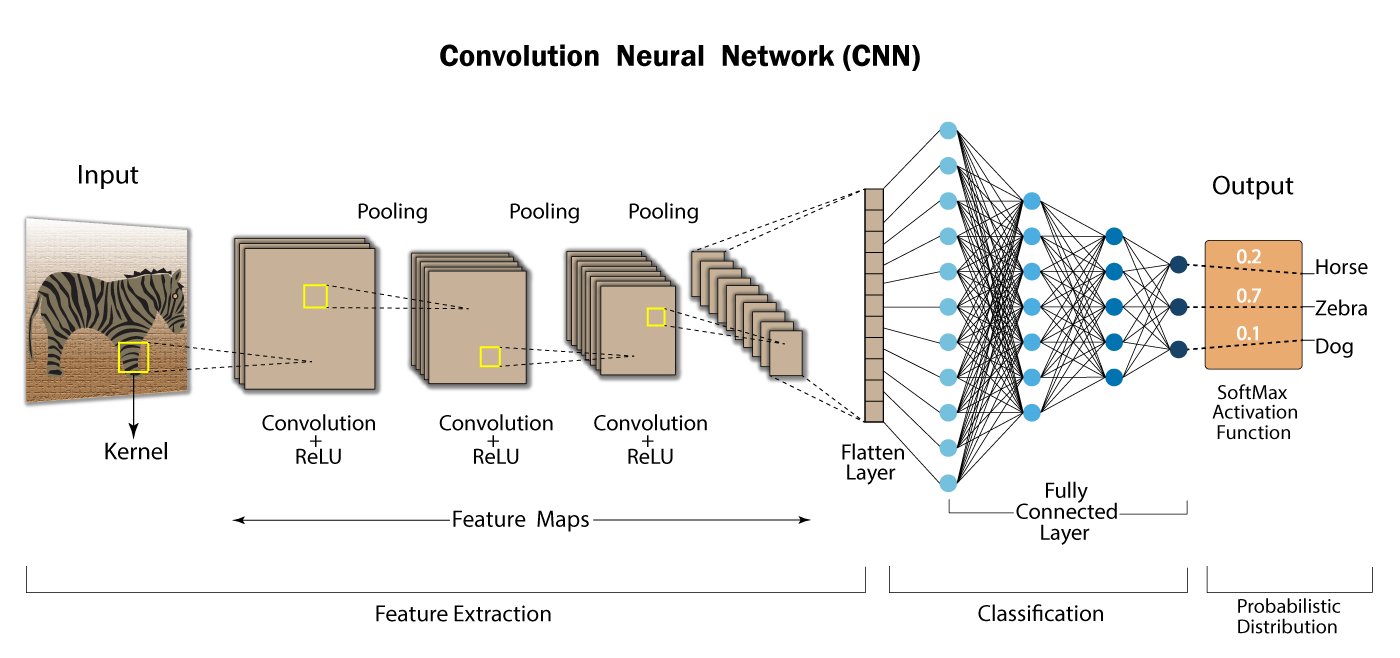

Image taken from: [DevelopersBreach](https://developersbreach.com/convolution-neural-network-deep-learning/)

## Convolution Layer

This layer performs the convolution operation, the dot product between two matrices as we learned earlier. It slides filters over the input image or previous feature maps to extract patterns like edges, textures, and object parts.

For a better understanding of the convolution idea, there is a helpful video of [3Blue1Brown](https://www.youtube.com/watch?v=KuXjwB4LzSA&ab_channel=3Blue1Brown).

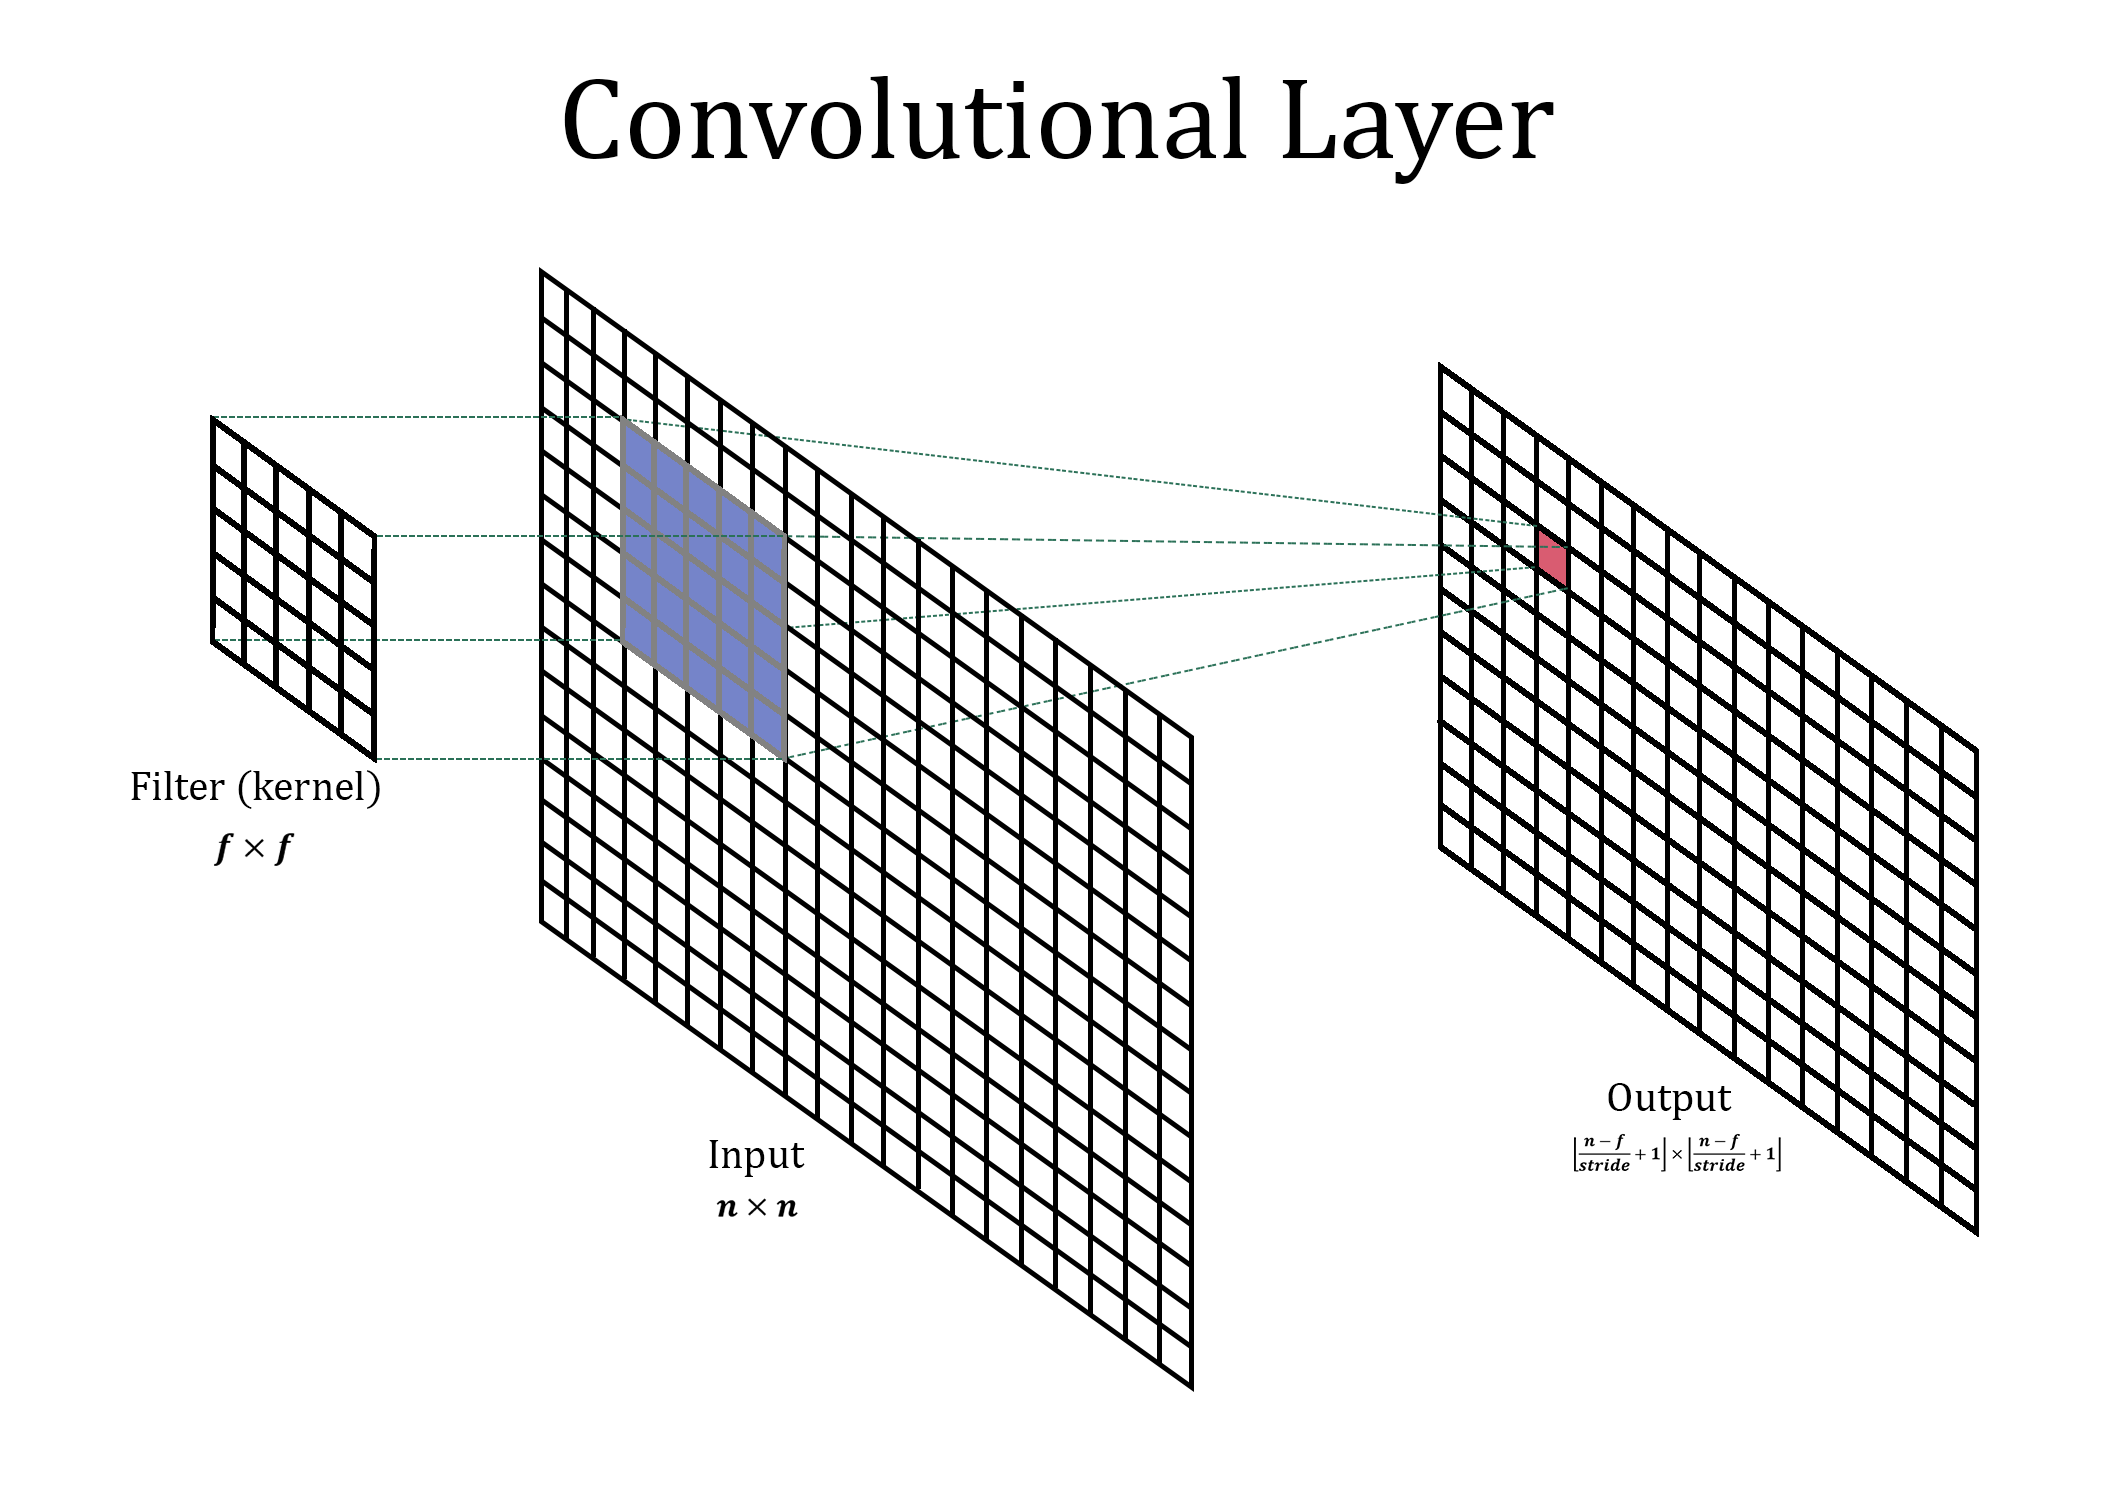

In a forward-pass, the filter go through the input in the form of scanning according to its specifications (stride, padding etc.), and for every filter stop a convolution (cross-correlation) operation is performed on the corresponding portion of the input to build one output value (As you can see in the image above).

## ReLu Layer (Rectified Linear Unit)

Introduces non-linearity into the network. Without this, the CNN would be just a linear function — which cannot model complex patterns.

$$R(x) = max(0,x)$$

## Pooling Layer

A pooling layer is used in Convolutional Neural Networks (CNNs) to reduce the spatial dimensions (height and width) of feature maps while preserving the most important information. The pooling layer technique use a kernel that goes though the input and extract one value to the output according to type of the pooling layer (In the figure below you can see example of Max-Pooling and Avg-Pooling). The output size, for every dimension, determined by the input size, kernel size, stride (step size)

Pooling Layer.png

This:

*   Makes the model faster and lighter,
*   Prevents overfitting,
*   Helps the model focus on key features, not exact pixel positions.

#### Max Pooling process
The $4\times4$ input matrix is divided into non-overlapping $2\times2$ blocks. For each block, the maximum value is taken.

#### Average Pooling process
Same $2\times2$ blocks as before. Instead of taking the max, compute the average of each block.

## Flattening Layer

Converts the 2D feature maps (e.g., $16\times16\times32$) into a 1D vector (e.g., length 8192) so it can be passed into fully connected layers.

- Neurons in fully connected layers expect input in vector format, not matrix format.

## Fully Conected Layer (FC)

The Fully Connected (FC) layer consists of the weights and biases. Every member of the output layer is connected through the weights to every member of the input layer.
(In the image you can see the input layer in blue, the output layer in red and the arcs that connects them are the weights)
In this manner, every member of the output layer is affected by every member of the input layer according to the corresponding weight.

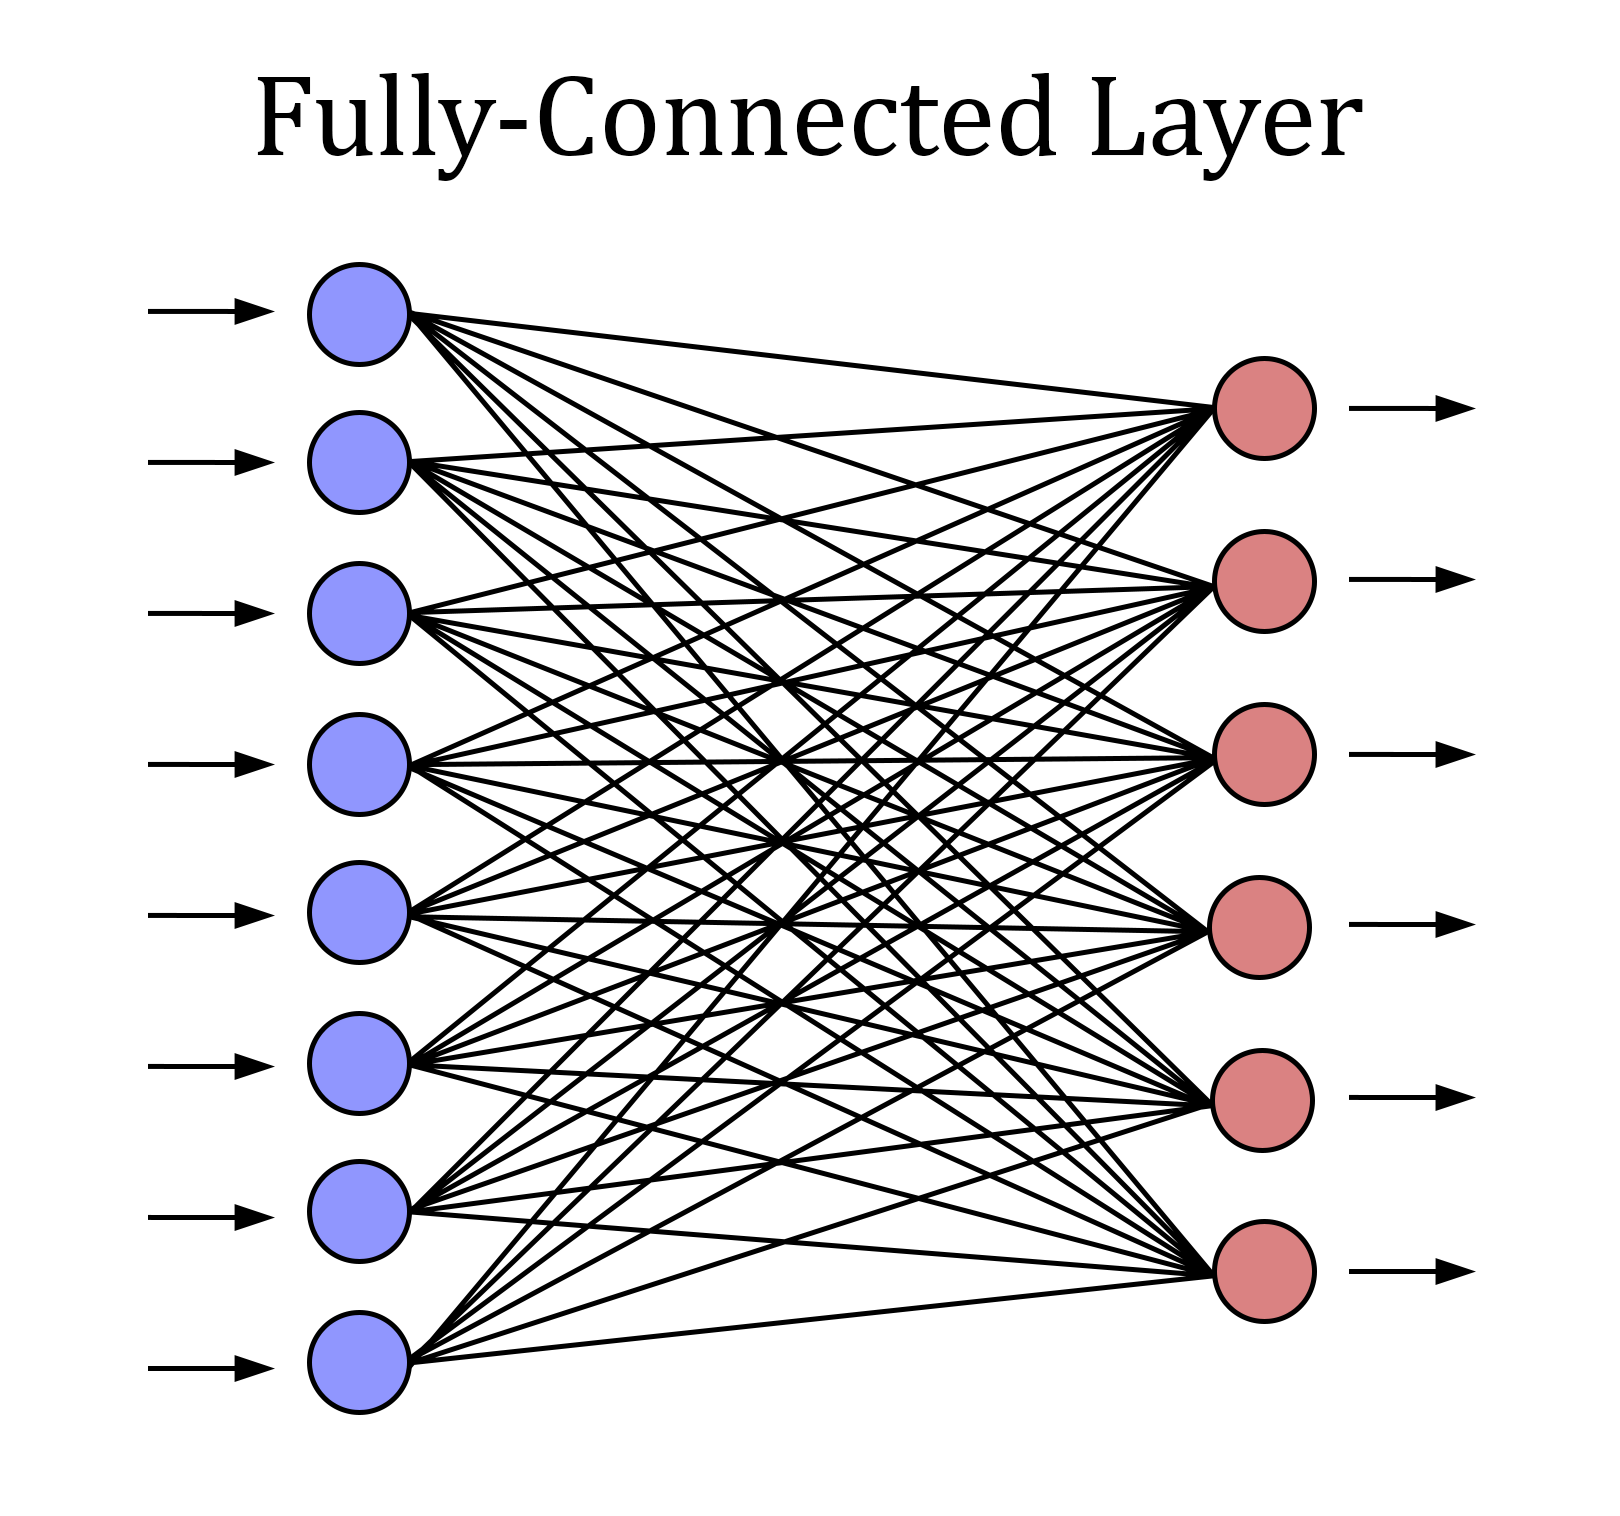

Performs final classification based on features extracted by the previous layers.


*   Every neuron is connected to all neurons in the previous layer.
*   Usually followed by:

 - Softmax (for multi-class classification)

 - Sigmoid (for binary classification)




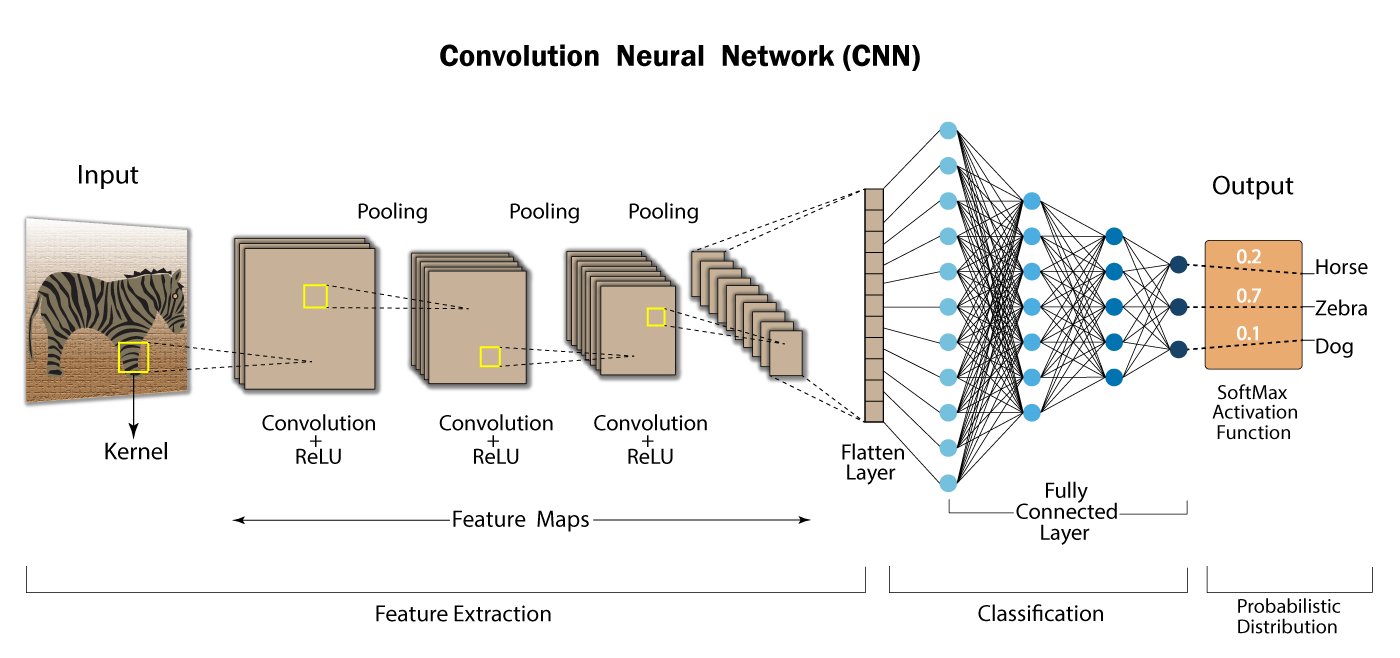

## A simple Convolutional Neural Network (CNN) for MNIST classification

    Architecture:
    - 2 Convolutional layers with ReLU and Batch Normalization
    - 2 Max Pooling layers
    - 2 Dropout for regularization
    - 2 Fully Connected (FC) layers
    - No explicit Softmax (handled by CrossEntropyLoss)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False)
# Defining a simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)  # CIFAR-10 images are 32x32
        self.fc2 = nn.Linear(128, 10)  # 10 output classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 + ReLU + Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 + ReLU + Pool
        x = x.view(-1, 32 * 8 * 8)            # Flatten
        x = F.relu(self.fc1(x))               # Fully connected
        x = self.fc2(x)                       # Output layer
        return x


model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
Max_epoch = 10
for epoch in range(5):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader): # train Loader needs to be defined
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}: Loss = {epoch_loss:.3f}, Training Accuracy = {epoch_accuracy:.2f}%")

print("Training finished.")


[Epoch 1, Batch 100] Loss: 2.025
[Epoch 1, Batch 200] Loss: 1.705
[Epoch 1, Batch 300] Loss: 1.566
[Epoch 1, Batch 400] Loss: 1.475
[Epoch 1, Batch 500] Loss: 1.397
[Epoch 1, Batch 600] Loss: 1.373
[Epoch 1, Batch 700] Loss: 1.329
[Epoch 1, Batch 800] Loss: 1.287
[Epoch 1, Batch 900] Loss: 1.284
[Epoch 1, Batch 1000] Loss: 1.246
[Epoch 1, Batch 1100] Loss: 1.217
[Epoch 1, Batch 1200] Loss: 1.233
[Epoch 1, Batch 1300] Loss: 1.194
[Epoch 1, Batch 1400] Loss: 1.208
[Epoch 1, Batch 1500] Loss: 1.158
[Epoch 2, Batch 100] Loss: 1.113
[Epoch 2, Batch 200] Loss: 1.117
[Epoch 2, Batch 300] Loss: 1.071
[Epoch 2, Batch 400] Loss: 1.074
[Epoch 2, Batch 500] Loss: 1.068
[Epoch 2, Batch 600] Loss: 1.025
[Epoch 2, Batch 700] Loss: 1.059
[Epoch 2, Batch 800] Loss: 1.047
[Epoch 2, Batch 900] Loss: 1.033
[Epoch 2, Batch 1000] Loss: 1.014
[Epoch 2, Batch 1100] Loss: 1.000
[Epoch 2, Batch 1200] Loss: 0.993
[Epoch 2, Batch 1300] Loss: 0.989
[Epoch 2, Batch 1400] Loss: 1.004
[Epoch 2, Batch 1500] Loss: 0.96

In [ ]:
import torch
import torch.nn as nn
class SimpleCNN(nn.Module):

    def __init__(self, num_classes = 10):
        super(SimpleCNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5)

        # Max-Pooling layers
        self.max1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.max2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully-Connected layers
        self.fc1 = nn.Linear(in_features=64 * 4 * 4, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=num_classes)

        # Batch Normalization
        self.batch1 = nn.BatchNorm2d(num_features=32)
        self.batch2 = nn.BatchNorm2d(num_features=64)

#### Training Epoch

In [ ]:
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Reset gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backpropagation
        loss.backward()

        # Update parameters
        optimizer.step()

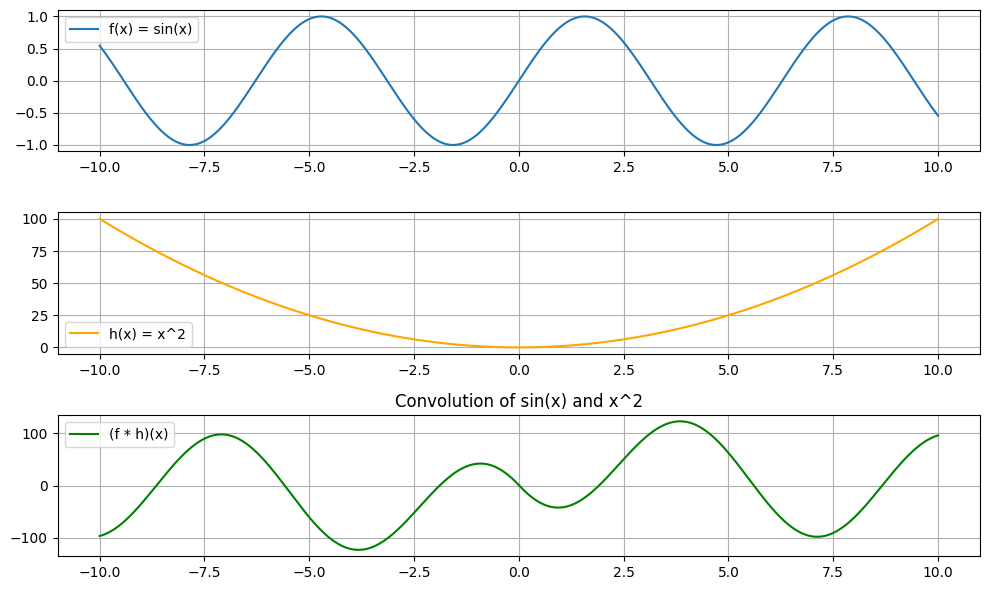

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Crear el dominio común
x = np.linspace(-10, 10, 1000)  # dominio común para ambas funciones

# 2. Definir funciones
f = np.sin(x)      # f(x) = sin(x)
h = x**2           # h(x) = x^2

# 3. Calcular convolución (discreta)
conv = np.convolve(f, h, mode='same') * (x[1] - x[0])  # escala por dx para aproximar la integral

# 4. Graficar
plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.plot(x, f, label='f(x) = sin(x)')
plt.legend()
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(x, h, label='h(x) = x^2', color='orange')
plt.legend()
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(x, conv, label='(f * h)(x)', color='green')
plt.legend()
plt.title('Convolution of sin(x) and x^2')
plt.grid(True)

plt.tight_layout()
plt.show()
